<a href="https://colab.research.google.com/github/igorcarmona/pythonProject/blob/master/Notas_dos_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas em geral

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
notas = pd.read_csv('ratings.csv')

In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "tempo"]

In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.head()

,usuarioId,filmeId,nota,tempo
0,1,1,4.00,964982703
1,1,3,4.00,964981247
2,1,6,4.00,964982224
3,1,47,5.00,964983815
4,1,50,5.00,964982931


In [ ]:
notas.nota.unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas.nota.value_counts()

4.00    26818
3.00    20047
5.00    13211
3.50    13136
4.50     8551
2.00     7551
2.50     5550
1.00     2811
1.50     1791
0.50     1370
Name: nota, dtype: int64

<Axes: ylabel='Frequency'>

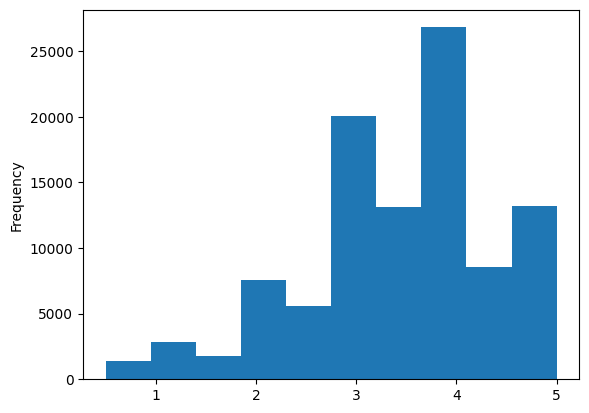

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
notas.nota.describe()

count   100836.00
mean         3.50
std          1.04
min          0.50
25%          3.00
50%          3.50
75%          4.00
max          5.00
Name: nota, dtype: float64

<Axes: >

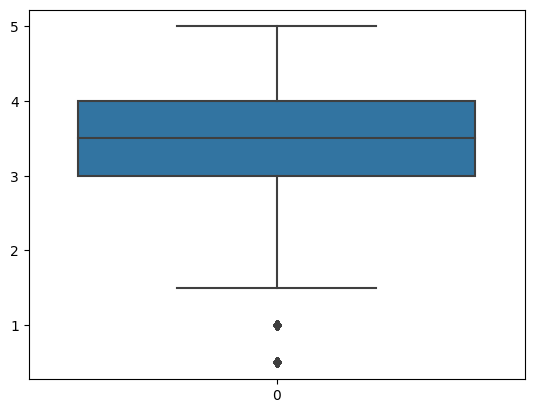

In [ ]:
sns.boxplot(notas.nota)

# Analisando os Filmes

In [ ]:
filmes = pd.read_csv('movies.csv')

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'genero']

In [ ]:
filmes.shape

(9742, 3)

In [ ]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando Usuario

In [ ]:
notas.groupby('usuarioId').nota.mean() # Calcular a média das notas dadas de cada usuário

usuarioId
1     4.37
2     3.95
3     2.44
4     3.56
5     3.64
      ... 
606   3.66
607   3.79
608   3.13
609   3.27
610   3.69
Name: nota, Length: 610, dtype: float64

In [ ]:
media_por_usuario = dict(notas.groupby('usuarioId').nota.mean())
media_por_usuario # Dict com as médias de notas dada por cada usuário

{1: 4.366379310344827,
 2: 3.9482758620689653,
 3: 2.4358974358974357,
 4: 3.5555555555555554,
 5: 3.6363636363636362,
 6: 3.4936305732484074,
 7: 3.2302631578947367,
 8: 3.574468085106383,
 9: 3.260869565217391,
 10: 3.2785714285714285,
 11: 3.78125,
 12: 4.390625,
 13: 3.6451612903225805,
 14: 3.3958333333333335,
 15: 3.448148148148148,
 16: 3.7244897959183674,
 17: 4.20952380952381,
 18: 3.7320717131474104,
 19: 2.607396870554765,
 20: 3.590909090909091,
 21: 3.260722347629797,
 22: 2.5714285714285716,
 23: 3.6487603305785123,
 24: 3.65,
 25: 4.8076923076923075,
 26: 3.238095238095238,
 27: 3.5481481481481483,
 28: 3.020175438596491,
 29: 4.1419753086419755,
 30: 4.735294117647059,
 31: 3.92,
 32: 3.7549019607843137,
 33: 3.7884615384615383,
 34: 3.4186046511627906,
 35: 4.086956521739131,
 36: 2.6333333333333333,
 37: 4.142857142857143,
 38: 3.217948717948718,
 39: 4.0,
 40: 3.766990291262136,
 41: 3.2534562211981566,
 42: 3.565909090909091,
 43: 4.552631578947368,
 44: 3.354166666

In [ ]:
df_media_por_usuario = pd.DataFrame(media_por_usuario, index=['media']).T # Agora em dataframe

In [ ]:
def rigidez(x): 
  df_media_por_usuario['rigidez'] = 'maleável'
  df_media_por_usuario.loc[df_media_por_usuario['media'].astype(int) <= 3.5, 'rigidez'] = 'rigido'

  return df_media_por_usuario

In [ ]:
rigidez(df_media_por_usuario)

,media,rigidez
1,4.37,maleável
2,3.95,rigido
3,2.44,rigido
4,3.56,rigido
5,3.64,rigido
...,...,...
606,3.66,rigido
607,3.79,rigido
608,3.13,rigido
609,3.27,rigido


In [ ]:
df_media_por_usuario.query('rigidez == "maleável"') # Usuários não tão rígidos em relações ao filmes

,media,rigidez
1,4.37,maleável
12,4.39,maleável
17,4.21,maleável
25,4.81,maleável
29,4.14,maleável
...,...,...
585,4.34,maleável
586,4.37,maleável
589,4.03,maleável
595,4.20,maleável


# Algumas notas específicas

In [ ]:
notas.query('filmeId==1').nota.mean() 

3.9209302325581397

In [ ]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [ ]:
notas.groupby('filmeId')

In [ ]:
media_por_filme = dict(notas.groupby('filmeId').nota.mean())
media_por_filme

In [ ]:
print('Id do filme com melhor média:')
print(max(media_por_filme, key=media_por_filme.get))
print('Id do filme com pior média:')
print(min(media_por_filme, key=media_por_filme.get))

Id do filme com melhor média:
53
Id do filme com pior média:
3604


In [ ]:
melhor = media_por_filme.get(53) # A nota da melhor média.
print(melhor)

5.0


In [ ]:
pior = media_por_filme.get(3604) # A nota da pior média. 
print(pior)

0.5


In [ ]:
media_por_filme = (notas.groupby('filmeId').nota.mean())

<ipython-input-29-0465589875aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_por_filme, bins = 10) # Gráfico com as médias de notas dos filmes


<Axes: xlabel='nota', ylabel='Density'>

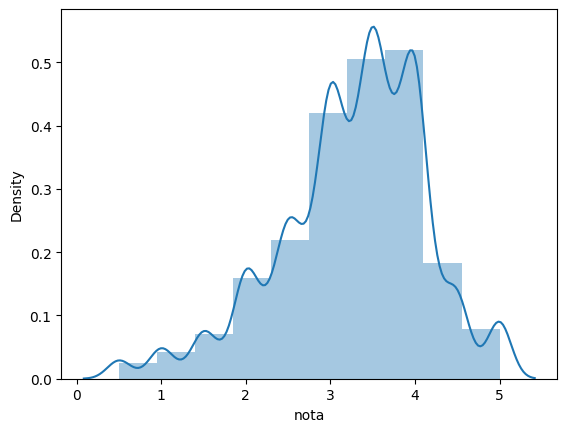

In [ ]:
sns.distplot(media_por_filme, bins = 10) # Gráfico com as médias de notas dos filmes 
                                         

Text(0.5, 1.0, 'média por filme')

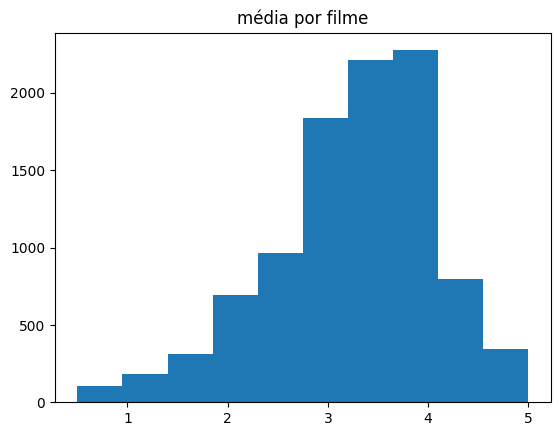

In [ ]:
plt.hist(media_por_filme)
plt.title("média por filme")